In [1]:
import pandas as pd
# import spacy
# spacy.cli.download("en_core_web_lg")
from sklearn.model_selection import train_test_split
import numpy as np
import re
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pickle
# Plot
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('consumer_complaints.csv')
df['complain_length'] = df['consumer_complaint_narrative'].str.count(' ') + 1
df=df[df['complain_length']>1]

yes_df=df[df['consumer_disputed?']=='Yes']
no_df=df[df['consumer_disputed?']=='No']
n=4000
yes_df = yes_df.sample(n=n)
no_df = no_df.sample(n=n)

# df = df.sample(20000, random_state=1).copy()

df = yes_df.copy(deep=True)
df = df.append(no_df, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print("missing values: {}".format(df.isnull().sum()))
print("dataframe index: {}".format(df.index))
print("dataframe types: {}".format(df.dtypes))
print("dataframe shape: {}".format(df.shape))
print("dataframe describe: {}".format(df.describe()))

In [ ]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id',
       'complain_length'],
      dtype='object')

In [4]:
df_value_counts=df['consumer_disputed?'].value_counts()
product_value_counts=df['product'].value_counts()
product_value_counts

Debt collection            2044
Mortgage                   1954
Credit reporting           1415
Credit card                 928
Bank account or service     715
Consumer Loan               445
Student loan                257
Prepaid card                 83
Payday loan                  72
Money transfers              70
Other financial service      17
Name: product, dtype: int64

In [3]:
# Prepreocessing

def stemming(content):
    review = re.sub('[^a-zA-Z]',' ',content)
    review = review.lower()
    review = review.split()
    review =[item for item in review if item not in ENGLISH_STOP_WORDS]
    review = ' '.join(review)
    return review

df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(stemming)

EDA

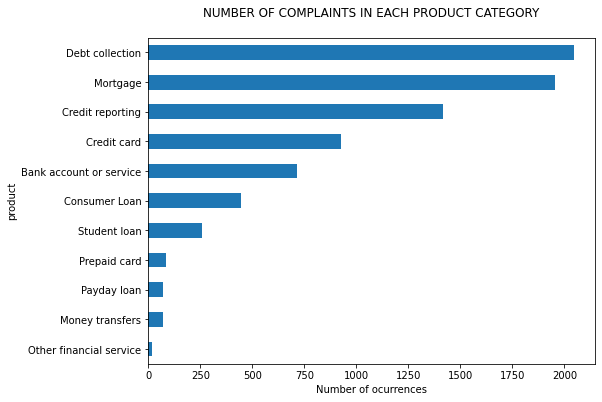

In [5]:
fig = plt.figure(figsize=(8,6))
df.groupby('product')['consumer_complaint_narrative'].count().sort_values().plot.barh(
    ylim=0, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);


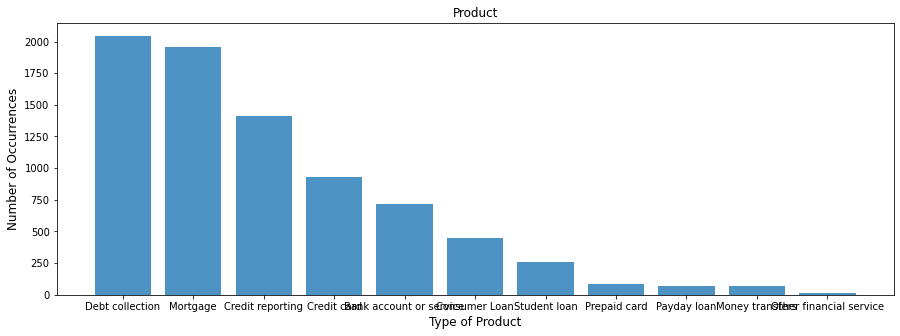

In [6]:
plt.figure(figsize=(15,5))
# plt.bar(real_subject_count.index, real_subject_count.values, alpha=0.8, label='Real')
plt.bar(product_value_counts.index, product_value_counts.values, alpha=0.8, label='Subject')
# plt.bar(subject_count.index, subject_count.values, alpha=0.8, label='Real')
plt.title('Product')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type of Product', fontsize=12)
plt.show()

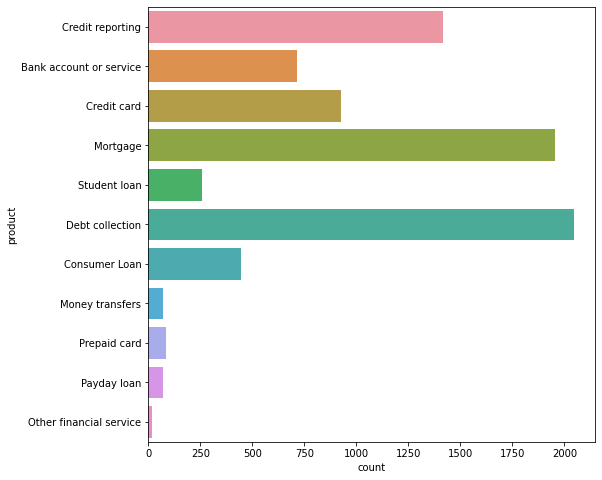

In [7]:
plt.figure(figsize=(8,8))
sns.countplot(y='product', data = df)

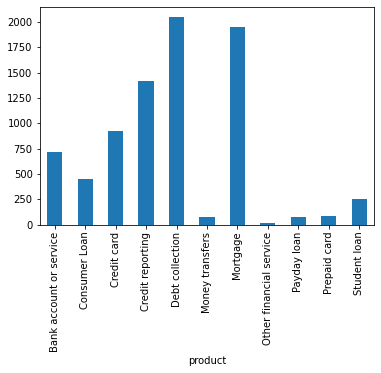

In [8]:
df.groupby(['product'])['consumer_complaint_narrative'].count().plot(kind="bar")
plt.show()


Text(0.5, 1.0, 'Distribution of The Product According to consumer_disputed')

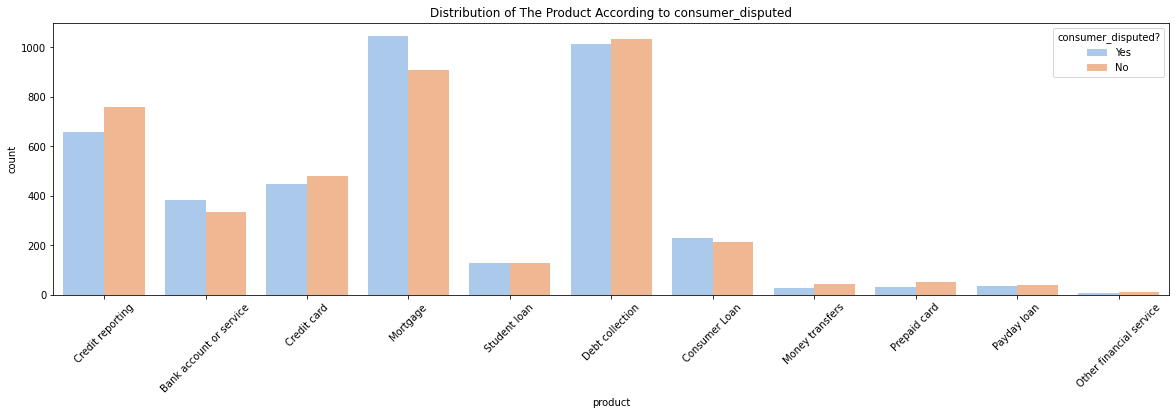

In [9]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(x="product",  hue='consumer_disputed?', data=df, palette="pastel")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Distribution of The Product According to consumer_disputed")

In [ ]:
# First : Convert to numeric feature 
# sns.pairplot(df)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


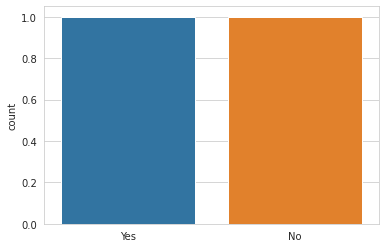

In [10]:
sns.set_style("whitegrid")
sns.countplot(df_value_counts.index)

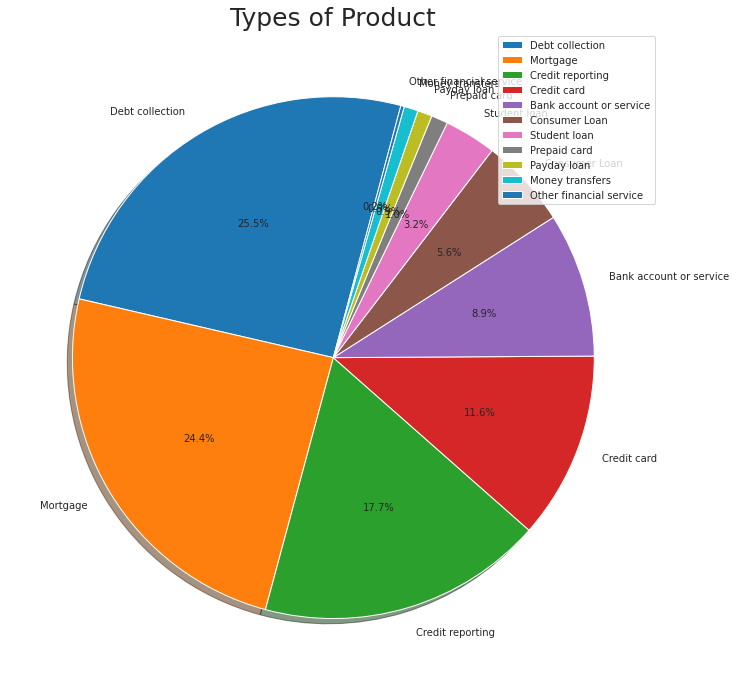

In [11]:
df['product'].value_counts().plot.pie(figsize = (15,12), startangle = 75,autopct = "%.1f%%",shadow=True)
plt.title('Types of Product', fontsize = 25)
plt.axis('off')
plt.legend()
plt.show()

In [34]:
# df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna('Un'))

tfidf = TfidfVectorizer()
tfidf.fit(df['consumer_complaint_narrative'].values)
X = tfidf.transform(df['consumer_complaint_narrative'].values).toarray()

y=df['consumer_disputed?']

In [35]:
# I need more information about how works scaler.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=scaler.fit(X)
data=scaler.transform(X)

In [36]:
le = LabelEncoder()
y = le.fit_transform(y)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,y,test_size=0.25,random_state=2022)

In [38]:
model_Multinomial = MultinomialNB()
model_Multinomial.fit(X_train, y_train)
y_pred_Multinomial = model_Multinomial.predict(X_test)

              precision    recall  f1-score   support

           0       0.56      0.61      0.59      1029
           1       0.55      0.49      0.52       971

    accuracy                           0.55      2000
   macro avg       0.55      0.55      0.55      2000
weighted avg       0.55      0.55      0.55      2000



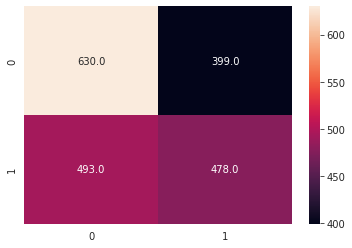

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(classification_report(y_test, y_pred_Multinomial))

confusion_m = confusion_matrix(y_test, y_pred_Multinomial)
sns.heatmap(confusion_m, annot=True,fmt=".1f")


In [41]:
from sklearn.linear_model import LogisticRegression
model_log_reg = LogisticRegression()
model_log_reg.fit(X_train, y_train)

y_pred_model_log_reg = model_log_reg.predict(X_test)
# training_data_accuracy = accuracy_score(X_train_prediction, y_train)


              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1029
           1       0.54      0.54      0.54       971

    accuracy                           0.55      2000
   macro avg       0.55      0.55      0.55      2000
weighted avg       0.55      0.55      0.55      2000



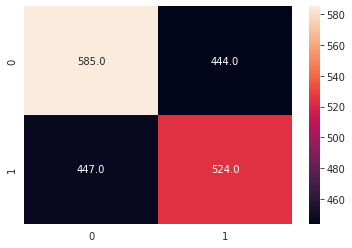

In [42]:
print(classification_report(y_test, y_pred_model_log_reg))
confusion_log = confusion_matrix(y_test, y_pred_model_log_reg)
sns.heatmap(confusion_log, annot=True,fmt=".1f")

In [43]:
from sklearn.linear_model import PassiveAggressiveClassifier

linear_clf = PassiveAggressiveClassifier(max_iter=50)

linear_clf.fit(X_train, y_train)
y_pred_linear_clf = linear_clf.predict(X_test)


              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1029
           1       0.53      0.53      0.53       971

    accuracy                           0.54      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.54      0.54      0.54      2000



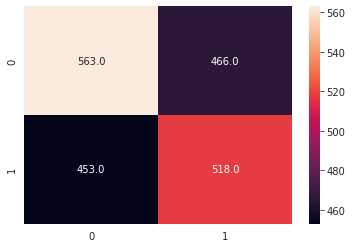

In [44]:
print(classification_report(y_test, y_pred_linear_clf))
confusion_linear_clf = confusion_matrix(y_test, y_pred_linear_clf)
sns.heatmap(confusion_linear_clf, annot=True,fmt=".1f")

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# model_random_forest = RandomForestRegressor() #n_estimators = 1000, random_state = 42
# model_random_forest.fit(X_train, y_train)
# y_pred_random_forest = model_random_forest.predict(X_test)


In [ ]:
# print(classification_report(y_test, y_pred_random_forest))
# confusion_linear_clf = confusion_matrix(y_test, y_pred_random_forest)
# sns.heatmap(model_random_forest, annot=True,fmt=".1f")